In [1]:
import sys
from __future__ import division

In [2]:
import numpy as np
from phasor.utilities.ipynb.displays import *
from phasor.utilities.ipynb.sympy import *

import declarative

from declarative.bunch import (
    DeepBunch
)

import phasor.math.dispatched as dmath 
#import phasor.math.dispatch_sympy

Populating the interactive namespace from numpy and matplotlib
Sympy version:  1.0


In [3]:
import phasor.utilities.version as version
print(version.foundations_version())

from phasor.utilities.np import logspaced

from phasor import optics
from phasor import base 
from phasor import signals 
from phasor import system
from phasor import readouts 

import scipy.signal

b'2017-09-29 14:18:38 -0400 (bbb2b427cdfd3d3fc1a626fa4fa5404882cc9820)'


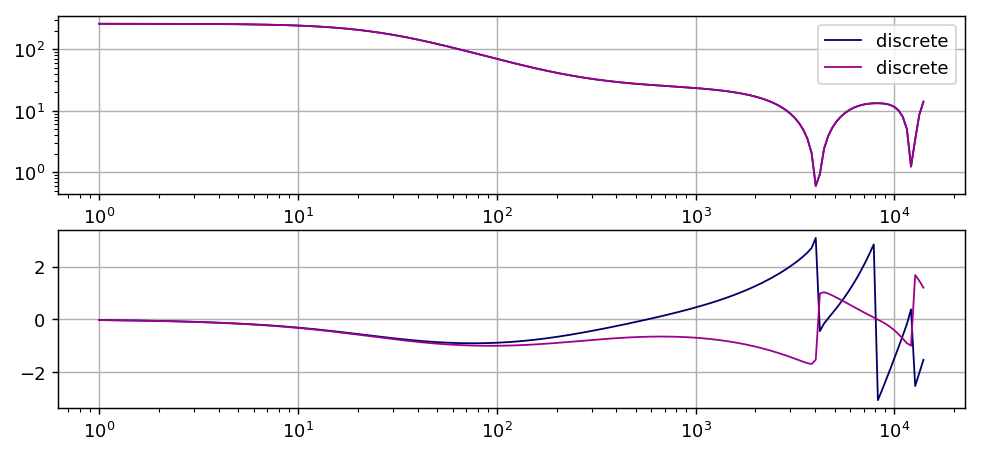

In [163]:
F_nyquist = 16384 / 2
F_AC = F_nyquist * 2 * np.arange(0, 1001) / 1001
    
F_AC = logspaced(1, 14000, 200)
ZPKz = (
    [
        .9,
        -.3,
        0+.99j,
        0-.99j,
    ], 
    [
        #.9,
        .99,
        #-.2,
    ], 
    10
)


b,a = scipy.signal.zpk2tf(*ZPKz)


Fb = mplfigB(Nrows=2)
w, h = scipy.signal.freqz_zpk(*ZPKz , worN = F_AC / F_nyquist * np.pi)
F_exact = h
Fb.ax0.loglog(F_AC, abs(h), label = 'discrete')
Fb.ax1.semilogx(F_AC, np.angle(h), label = 'discrete')

w, h = scipy.signal.freqz(b, a , worN = F_AC / F_nyquist * np.pi)
F_exact = h
Fb.ax0.loglog(F_AC, abs(h), label = 'discrete')
Fb.ax1.semilogx(F_AC, np.angle(h), label = 'discrete')

Fb.ax0.legend()

In [164]:
b

array([ 10.     ,  -6.     ,   7.101  ,  -5.8806 ,  -2.64627])

In [165]:
np.fft.fft(b, len(F_exact)) / F_exact

array([  1.00010956e-02 +3.49823081e-04j,
         1.00512477e-02 +2.81079809e-03j,
         1.03709956e-02 +5.25055504e-03j,
         1.09553206e-02 +7.63768441e-03j,
         1.17955624e-02 +9.94164594e-03j,
         1.28795554e-02 +1.21331859e-02j,
         1.41918126e-02 +1.41847337e-02j,
         1.57137552e-02 +1.60707734e-02j,
         1.74239826e-02 +1.77681826e-02j,
         1.92985807e-02 +1.92565376e-02j,
         2.13114617e-02 +2.05183768e-02j,
         2.34347323e-02 +2.15394218e-02j,
         2.56390825e-02 +2.23087521e-02j,
         2.78941917e-02 +2.28189314e-02j,
         3.01691431e-02 +2.30660841e-02j,
         3.24328436e-02 +2.30499217e-02j,
         3.46544395e-02 +2.27737189e-02j,
         3.68037251e-02 +2.22442406e-02j,
         3.88515363e-02 +2.14716210e-02j,
         4.07701236e-02 +2.04691979e-02j,
         4.25335007e-02 +1.92533045e-02j,
         4.41177620e-02 +1.78430229e-02j,
         4.55013664e-02 +1.62599033e-02j,
         4.66653820e-02 +1.4527653

In [166]:
np.fft.ifft(F_exact)

array([  9.84262264e+01 -3.95886623e+01j,
         4.43535746e+01 +7.17347990e+01j,
        -1.61554356e+01 +3.11082313e+01j,
         3.86408730e+00 +6.45812192e+00j,
         3.50569064e+00 +1.02844390e+01j,
        -6.30267662e-01 +7.15147805e+00j,
        -1.66859960e-01 +6.04838778e+00j,
        -2.36448806e-02 +6.12149091e+00j,
         2.12207914e-01 +5.59596962e+00j,
         5.60109826e-01 +5.03117384e+00j,
         7.35930578e-01 +4.50911662e+00j,
         8.10257203e-01 +4.03495409e+00j,
         8.38143684e-01 +3.65161821e+00j,
         8.45208658e-01 +3.34528880e+00j,
         8.51928384e-01 +3.09288134e+00j,
         8.63784002e-01 +2.87711109e+00j,
         8.79034603e-01 +2.68512486e+00j,
         8.94484482e-01 +2.50962952e+00j,
         9.07194764e-01 +2.34729154e+00j,
         9.15407568e-01 +2.19681905e+00j,
         9.18577836e-01 +2.05781896e+00j,
         9.17004891e-01 +1.93009669e+00j,
         9.11461554e-01 +1.81332888e+00j,
         9.02897925e-01 +1.7069798

In [170]:
F_use = np.concatenate([F_AC, -F_AC])
F_bal = np.concatenate([F_exact, F_exact.conjugate()])

order_b = 5 #len(b)
order_a = 2 #len(a)
Z = np.exp(-1j * np.pi * F_use / F_nyquist)
Z_a = np.vstack([Z**j for j in range(order_a)]).T
Z_a_full = np.vstack([Z**j for j in range(len(F_use))]).T
Z_b = np.vstack([Z**j for j in range(order_b)]).T
Z_b_full = np.vstack([Z**j for j in range(len(F_use))]).T
Z_b.shape



w, h = scipy.signal.freqz(b, [1], worN = F_use / F_nyquist * np.pi)
W = abs(h)
#W = 1
M_b = np.einsum('ij,i->ij', Z_b_full,  W * ones_like(F_bal))
M_a = np.einsum('ij,i->ij', Z_a_full,  W * (F_bal))
#M_b = np.einsum('ij,i->ij', Z_b_full, (1/F_exact))
#M_a = np.einsum('ij,i->ij', Z_a, ones_like(F_exact))
#else:
    #a_z = np.einsum('ij,j->i', Z_a, a_fit)
    #b_z = np.einsum('ij,j->i', Z_b, b_fit)
    #M_b = np.einsum('ij,i->ij', Z_b, 1/F_exact / np.abs(a_z))
    #M_a = Z_a / np.abs(a_z).reshape(-1,1)
    #M_b2 = Z_b / np.abs(b_z).reshape(-1,1)
    #M_a2 = np.einsum('ij,i->ij', Z_a, F_exact / np.abs(b_z))
    #Fb = mplfigB(Nrows=1)
    #w, h = scipy.signal.freqz(b, a, worN = F_AC / F_nyquist * np.pi)
    #Fb.ax0.loglog(F_AC, abs(a_z), label = 'discrete')
    #Fb.ax0.loglog(F_AC, abs(b_z), label = 'discrete')
#    pass

ZZ = np.einsum('ij,jk->ik',  np.linalg.pinv(M_b[:,order_b:]), M_a[:, :order_a])
U,S,V = scipy.linalg.svd(ZZ)
print(S)
a_fit = V.T[:order_a, -1]
print(a_fit / a_fit[0])
print(np.roots(a_fit))
print()
ZZ = np.einsum('ij,jk->ik', np.linalg.pinv(M_a[:, :order_a]), M_b[:,order_b:])
U,S,V = scipy.linalg.svd(ZZ)
print(S)
S
a_fit = (U[:order_a, -1])
print(a_fit / a_fit[0])
print(np.roots(a_fit))

##ZZ = np.einsum('ij,jk->ik', np.linalg.pinv(M_a[:, :])[:order_a,:], M_b[:,order_b:])
ZZ.shape

ZX = np.block([M_a[:, :order_a], -M_b[:, order_b:]])
ZX.shape

[  9.25570337e+12   4.86688140e+04]
[ 1.00000000 -0.00000000e+00j -0.99000001 -1.15375031e-10j]
[ 0.99000001 +1.15375031e-10j]

[ 0.19920489  0.04323823]
[ 1.00000000 -0.00000000e+00j  0.99722812 -3.66039605e-17j]
[-0.99722812 +3.66039605e-17j]


In [82]:
U,S,V = scipy.linalg.svd(ZX)
#print(S)
S
V[:order_a, 3]

array([ 0.00551587 +1.14814257e-17j,  0.00011294 +3.33673396e-18j])

In [83]:
fj = F_exact
n = 2
m = 3
N = len(fj)
col = np.fft.ifft(fj)/(N+1);
col = col
row = np.fft.ifft(fj.conjugate()).conjugate()/(N+1);
row = row
Z = scipy.linalg.toeplitz(col,row[0:n]);
[U,S,V] = np.linalg.svd(Z[m:,:]);
arat = V[:,-1];
qj = np.fft.fft(arat, N);
bh = np.fft.ifft(qj * fj);
brat = bh[0:m+0];
pj = np.fft.fft(brat,N+0);
print(S)
V

[  1.15584629e-02   2.78281161e-17]


array([[-0.70354460 +0.00000000e+00j, -0.71065111 +6.02900820e-17j],
       [-0.71065111 +0.00000000e+00j,  0.70354460 -5.96871811e-17j]])

In [84]:
brat / b

array([-0.71065111 +1.19148846e-16j, -0.71065111 -1.80190172e-16j,
       -0.71065111 +1.49918484e-15j])

In [85]:
print(arat / a)
print(arat / arat[0])
arat

[-0.71065111 +6.02900820e-17j -0.71065111 +6.02900820e-17j]
[ 1.00-0.j -0.99-0.j]


array([-0.71065111 +6.02900820e-17j,  0.70354460 -5.96871811e-17j])

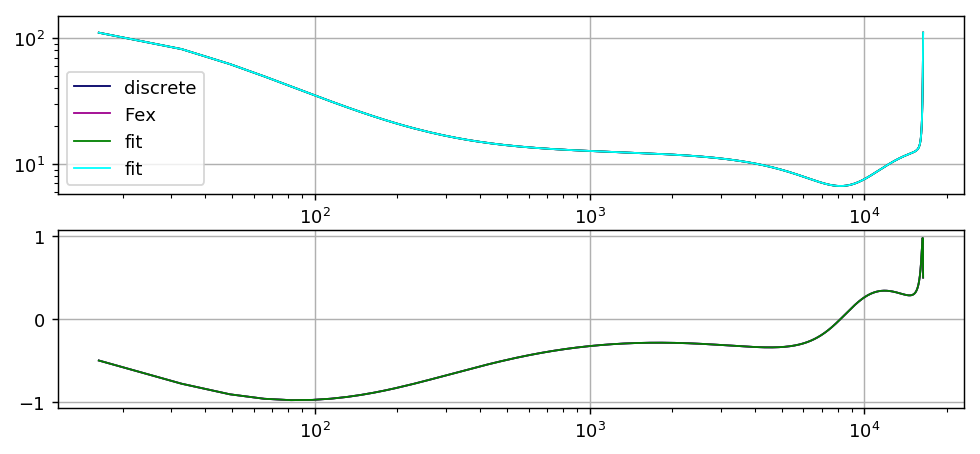

In [86]:
Fb = mplfigB(Nrows=2)
w, h = scipy.signal.freqz(b, a, worN = F_AC / F_nyquist * np.pi)
Fb.ax0.loglog(F_AC, abs(h), label = 'discrete')
Fb.ax1.semilogx(F_AC, np.angle(h), label = 'discrete')

h = F_exact
Fb.ax0.loglog(F_AC, abs(h), label = 'Fex')
Fb.ax1.semilogx(F_AC, np.angle(h), label = 'Fex')

w, h = scipy.signal.freqz(brat, arat, worN = F_AC / F_nyquist * np.pi)
Fb.ax0.loglog(F_AC, abs(h), label = 'fit', color = 'green')
Fb.ax1.semilogx(F_AC, np.angle(h), label = 'fit', color = 'green')

Fb.ax0.loglog(F_AC, abs(pj/qj), label = 'fit', color = 'cyan')
#Fb.ax0.set_xscale('linear')
#Fb.ax1.semilogx(F_AC, np.angle(h), label = 'fit', color = 'green')
Fb.ax0.legend()

In [92]:
if len(F_AC) % 2 == 1:
    R = np.random.randn(len(F_AC)//2) + 1j*np.random.randn(len(F_AC)//2)
    R2 = np.concatenate([[0], R, R[::-1].conjugate()])
else:
    R = np.random.randn(len(F_AC)//2-1) + 1j*np.random.randn(len(F_AC)//2-1)
    R2 = np.concatenate([[0], R, [0], R[::-1].conjugate()])
len(R2)
len(F_AC)

In [97]:
F_noisy = F_exact * (1 + R2/10)
W = 1
M_b = np.einsum('ij,i->ij', Z_b_full,  W * ones_like(F_noisy))
M_a = np.einsum('ij,i->ij', Z_a_full,  W * (F_noisy))
#M_b = np.einsum('ij,i->ij', Z_b_full, (1/F_exact))
#M_a = np.einsum('ij,i->ij', Z_a, ones_like(F_exact))
#else:
    #a_z = np.einsum('ij,j->i', Z_a, a_fit)
    #b_z = np.einsum('ij,j->i', Z_b, b_fit)
    #M_b = np.einsum('ij,i->ij', Z_b, 1/F_exact / np.abs(a_z))
    #M_a = Z_a / np.abs(a_z).reshape(-1,1)
    #M_b2 = Z_b / np.abs(b_z).reshape(-1,1)
    #M_a2 = np.einsum('ij,i->ij', Z_a, F_exact / np.abs(b_z))
    #Fb = mplfigB(Nrows=1)
    #w, h = scipy.signal.freqz(b, a, worN = F_AC / F_nyquist * np.pi)
    #Fb.ax0.loglog(F_AC, abs(a_z), label = 'discrete')
    #Fb.ax0.loglog(F_AC, abs(b_z), label = 'discrete')
#    pass

ZZ = np.einsum('ij,jk->ik',  np.linalg.pinv(M_b[:,order_b:]), M_a[:, :order_a])
U,S,V = scipy.linalg.svd(ZZ)
print(S)
a_fit = V[:order_a, -1]
print(a_fit / a_fit[0])

ZZ = np.einsum('ij,jk->ik', np.linalg.pinv(M_a[:, :order_a]), M_b[:,order_b:])
U,S,V = scipy.linalg.svd(ZZ)
print(S)
S
a_fit = (U[:order_a, -1])
print(a_fit / a_fit[0])

##ZZ = np.einsum('ij,jk->ik', np.linalg.pinv(M_a[:, :])[:order_a,:], M_b[:,order_b:])
ZZ.shape

ZX = np.block([M_a[:, :order_a], -M_b[:, order_b:]])
ZX.shape

[ 11.99638871   1.14995556]
[ 1.0000000-0.j  0.9903007-0.j]
[ 0.03937128  0.0156761 ]
[ 1.00000000 +0.00000000e+00j -0.95341624 -4.20503990e-15j]


In [95]:
fj = F_noisy
n = 2
m = 3
N = len(fj)
col = np.fft.ifft(fj)/(N+1);
col = col
row = np.fft.ifft(fj.conjugate()).conjugate()/(N+1);
row = row
Z = scipy.linalg.toeplitz(col,row[0:n]);
[U,S,V] = np.linalg.svd(Z[m:,:]);
arat = V[:,-1];
qj = np.fft.fft(arat, N);
bh = np.fft.ifft(qj * fj);
brat = bh[0:m+0];
pj = np.fft.fft(brat,N+0);
print(S)
V

[ 0.01197244  0.00114766]


array([[-0.70365249 +0.00000000e+00j, -0.71054428 +6.34245856e-17j],
       [ 0.71054428 +0.00000000e+00j, -0.70365249 +6.28094115e-17j]])

In [ ]:
Z,T = scipy.linalg.schur(red3)
Z
@np.vectorize
def fmt(v):
    return "{0:.2e}".format(v)
    
def matrix_markdown(mat, fmt = fmt):
    display(Markdown(
        tabulate.tabulate(
            fmt(mat),
            tablefmt='pipe',
            headers = [''] * red1.shape[0]
    )))
    return
red3.shape

In [ ]:
a

In [ ]:
a_fit

In [ ]:
b


In [ ]:
b_fit